# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Importing necessary libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


By looking at the dataset we can see that we have categorical as well as numerical data in the dataset. 

Our target variable churn is a categorical data, we will see into how many classes it has, however it will be a classification model

Also we have identified that there is a feature column named customer id, which has no relevance in the prediction. It is just an unique id given to each customer, hence will consider dropping the column

In [5]:
df=df.drop(["customerID"],axis=1)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

In [9]:
#Checking the size of the dataset
df.shape

(7043, 20)

We can see that we have 7043 rows and 20 columns out of which 1 is a target variable.

In [10]:
#checking all the columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#checking the datatypes of the dataset
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that we have object and float datatypes. TotalCharges is a float type data but it is showing object type lets change the data type.

The object datatypes will be encoded later

In [12]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [13]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Above is the info about the dataset there is no null values in the dataset.

In [14]:
#Checking unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
#Checking unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Now we can see that our targer variable 'Churn' has only 2 classes.

In [15]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('______________________________________________')

Male      3555
Female    3488
Name: gender, dtype: int64
______________________________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
______________________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
______________________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
______________________________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
______________________________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
______________________________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
______________________________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
__________________________________________

Above are the value counts of each column and we can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i ahve to replace them.

Lets with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So lets replace all these entries with 'No'.

In [16]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [17]:
#Checking null values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see there are 11 null values in the 'Total Charges' feature.

## Treating Null Values

In [19]:
#Replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [20]:
#Checking null values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

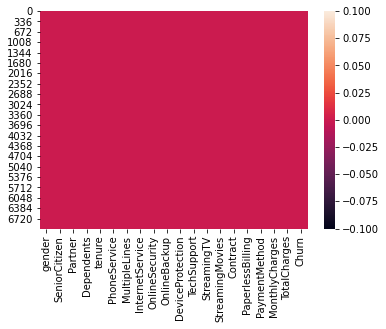

In [21]:
sns.heatmap(df.isnull())

Now we can clearly see that we have no null values in the dataset

## Statistical Overview of the Dataset

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Above are the statistics about the numerical columns.describe by default takes only numerical columns.There is some difference between the mean and 2nd quantile value which means there are some outliers.

## Visualization

In [24]:
# checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical:',cat_col,'\n')

# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical:',num_col)

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate Analysis for categorical columns

No     5174
Yes    1869
Name: Churn, dtype: int64


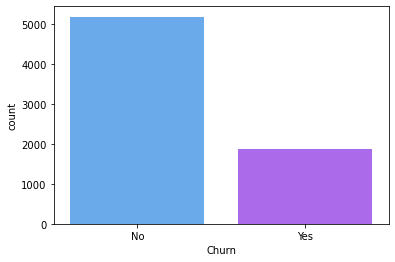

In [37]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="cool")
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned. This leads to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

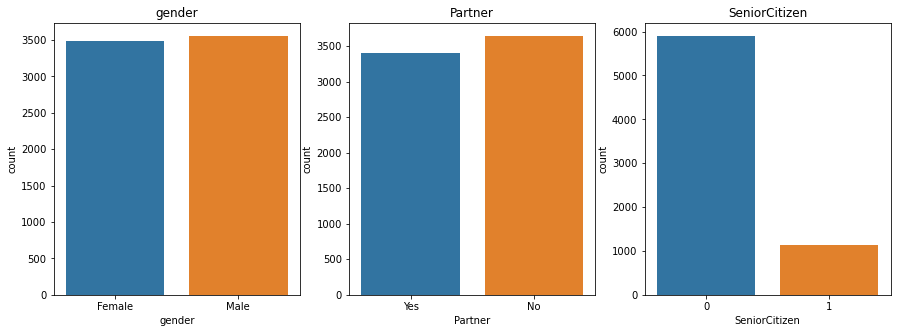

In [52]:
#Count plot for gender and Partner
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1,3,2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.subplot(1, 3, 3)
plt.title('SeniorCitizen')
sns.countplot(df['SeniorCitizen'])
plt.show()

Both the genders has same count almost and having partner or not also has same count. In senior citizen we see low number in senior citizen

No     4933
Yes    2110
Name: Dependents, dtype: int64


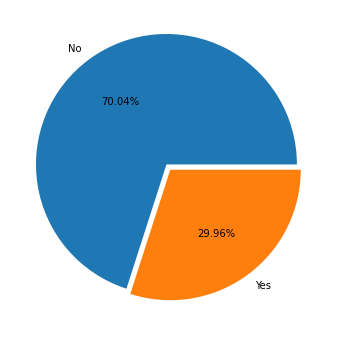

In [40]:
#Visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0))
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 70% of customers have dependents only 29.96% have no dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


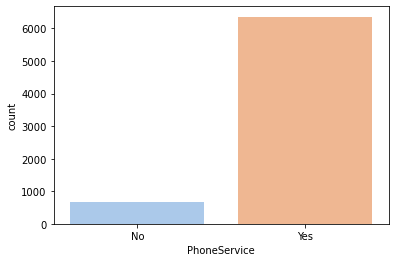

In [41]:
#Visualizing how many customers have Phone Service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="pastel")
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No     4072
Yes    2971
Name: MultipleLines, dtype: int64


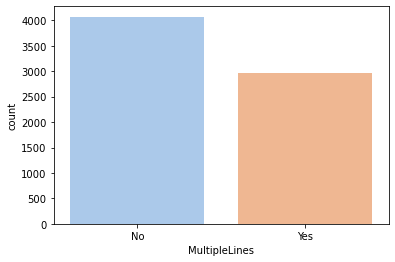

In [44]:
#Visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="pastel")
plt.show()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


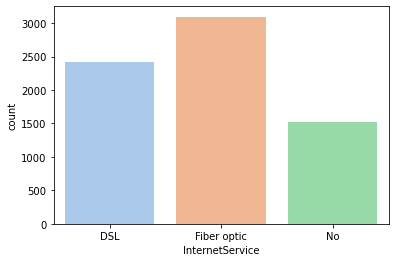

In [53]:
#Visualizing how many customers have Internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="pastel")
plt.show()

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service.

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


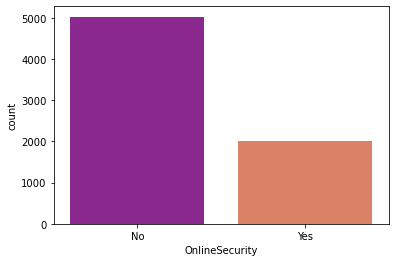

In [54]:
#Visualizing how many customers have OnlineSecurity
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

In the count plot we can observe the majority of customers who have internet services but they do not use any online security.

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


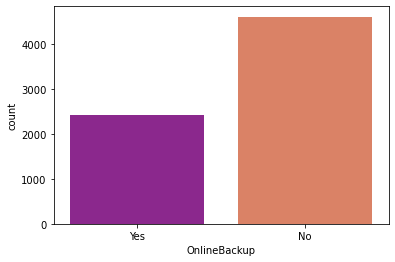

In [57]:
#Visualizing how many customers have Online backup
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"],palette="plasma")
plt.show()

We can see from the graph that we have more counts of customers without online backup

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


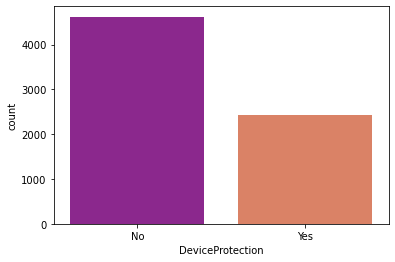

In [58]:
#Visualizing how many customers have DeviceProtection 
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"],palette="plasma")
plt.show()

Here also we can see that we have more customers with no device protection

No     4999
Yes    2044
Name: TechSupport, dtype: int64


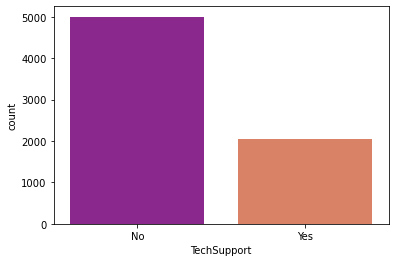

In [60]:
#Visualizing how many customers have TechSupport
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"],palette="plasma")
plt.show()

We can clearly see that we have more customers with no tech support.

No     4336
Yes    2707
Name: StreamingTV, dtype: int64


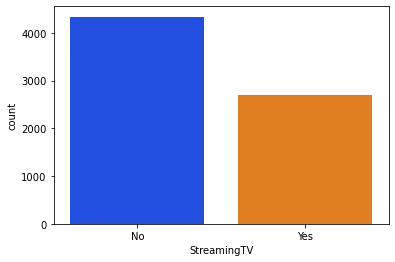

In [61]:
#Visualizing how many customers have StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")
plt.show()

It is clearly showing that most customers do not have tv streaming

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


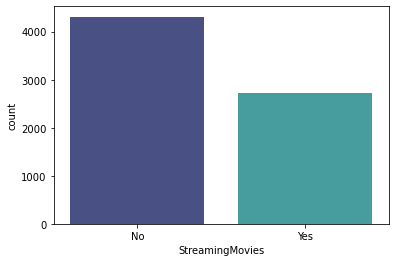

In [62]:
#Visualizing how many customers have StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="mako")
plt.show()

It is clearly showing that most customers do not have StreamingMovies.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


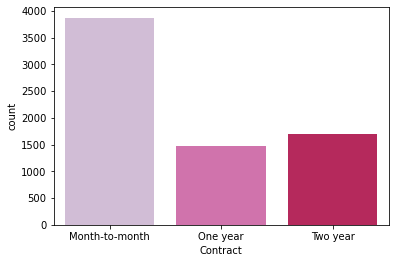

In [63]:
#Visualizing how many customers have Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


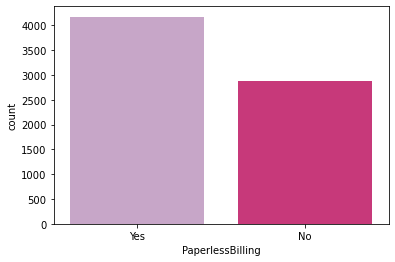

In [65]:
#Visualizing how many customers have PaymentMethod
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="PuRd")
plt.show()

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


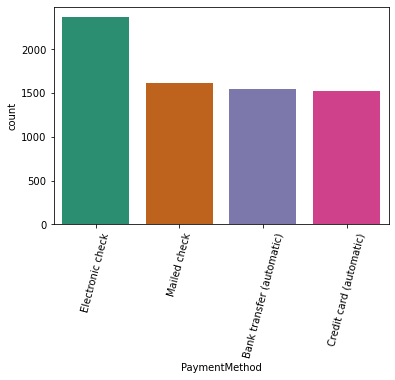

In [66]:
#Visualizing how many customers have Contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.

## Checking the distribution of the numerical columns

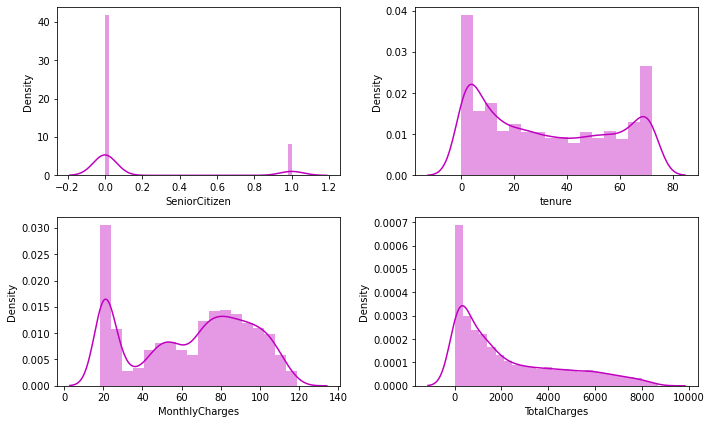

In [68]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have skewness.

## Bivariate Analysis

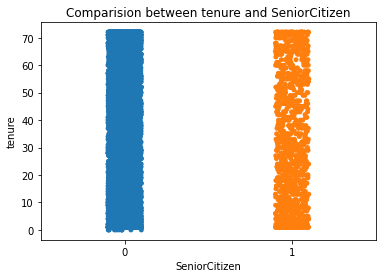

In [69]:
#Comparing tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

There is no significant difference between the features, here both the feature are in equal length.

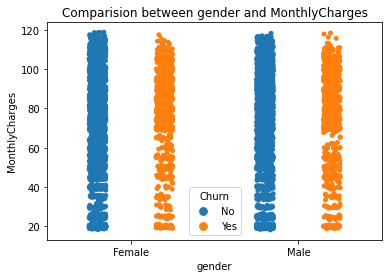

In [70]:
#Comparing gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Most both male and female customers with monthly charges above 60 have high chances of getting churned.

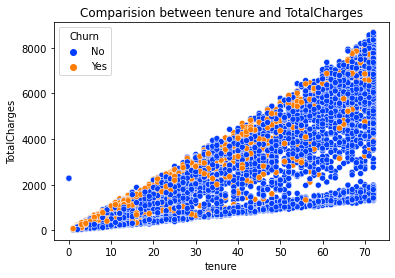

In [71]:
#Comparing tenure and TotalCharges 
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot( x = "tenure",y = "TotalCharges", data = df,hue="Churn",palette="bright")
plt.show()

Here we can notice the strong linear relation between the features.
As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

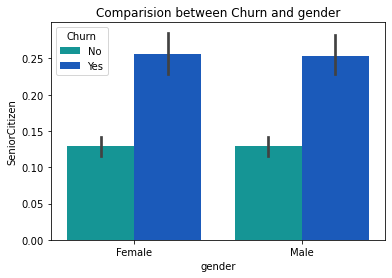

In [72]:
#Comparing gender and SeniorCitizen on the basis of churn
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df,palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case.

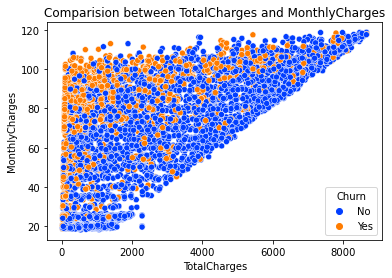

In [73]:
#Comparing TotalCharges and MonthlyCharges 
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges.
Also the if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

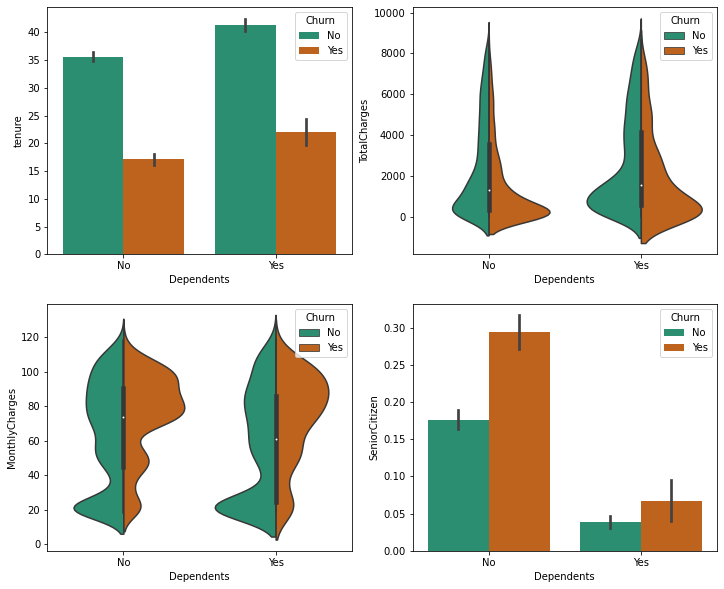

In [74]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="Dark2",hue="Churn")

# Checking Churn level in TotalCharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="Dark2",hue="Churn")
plt.show()

The customers who have dependents with high tenure, then the churned level is high80-110.

The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.

The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then teh ratio of churn is very high.

If the customer is a senior citizen and have no dependents then there is a tendancy of grtting churned.

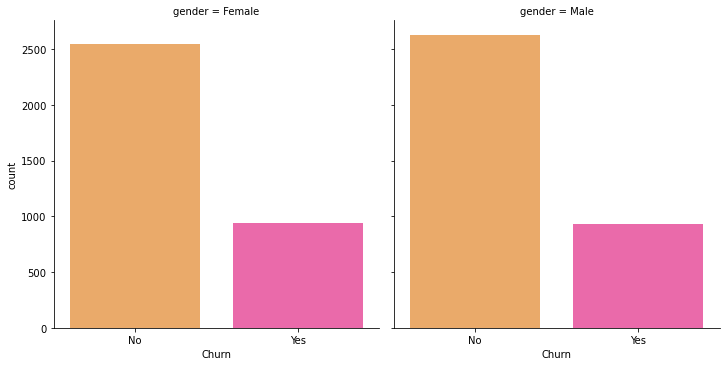

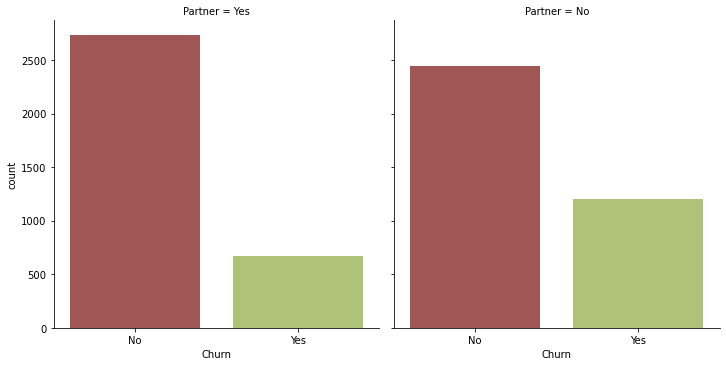

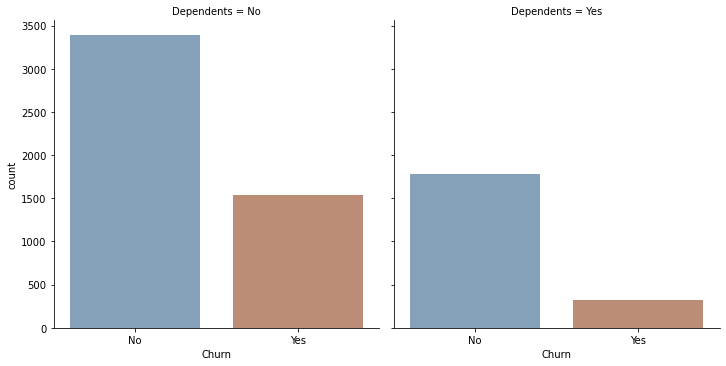

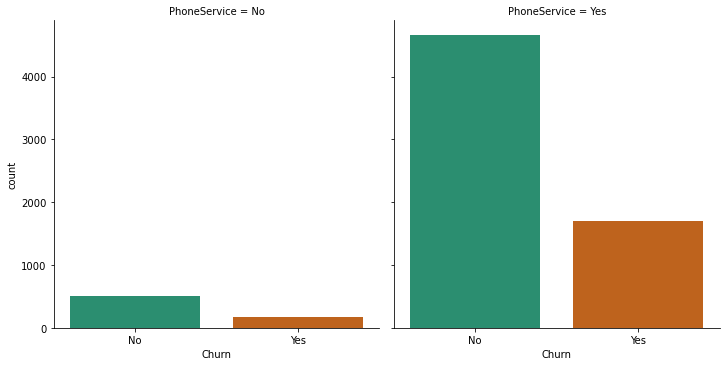

In [75]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned.

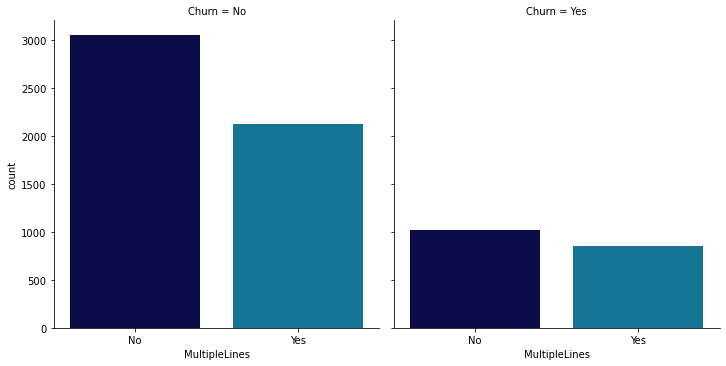

In [76]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

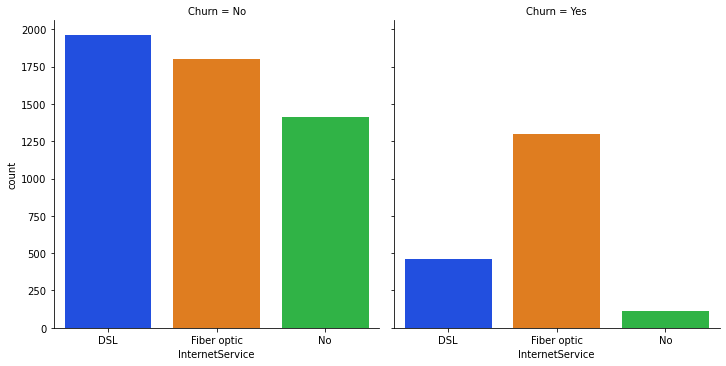

In [77]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

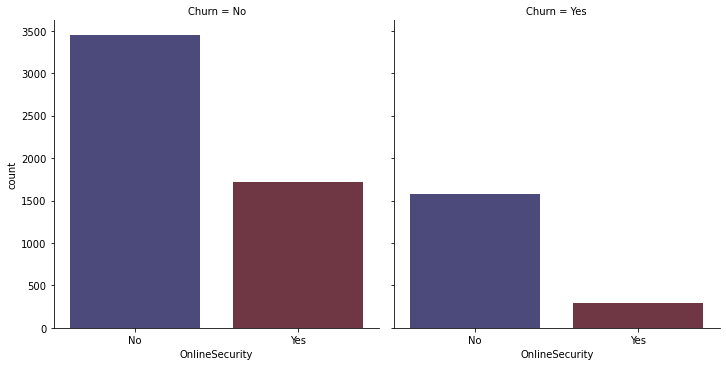

In [78]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

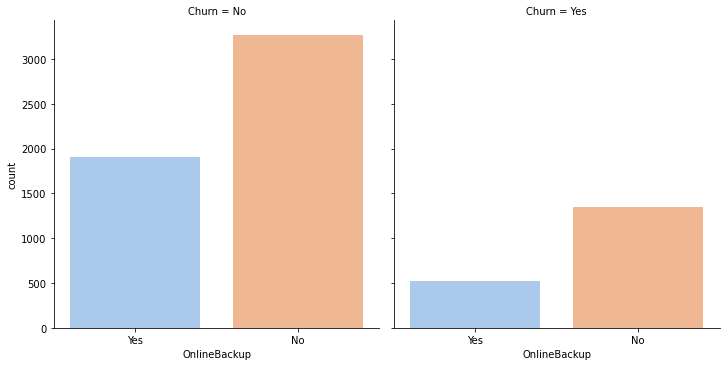

In [80]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

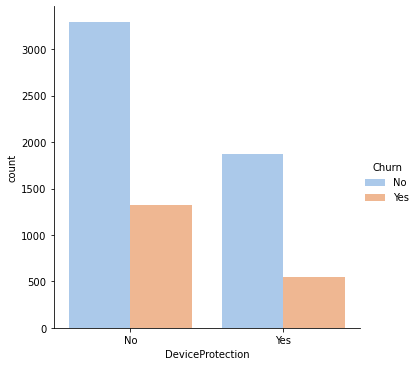

In [82]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

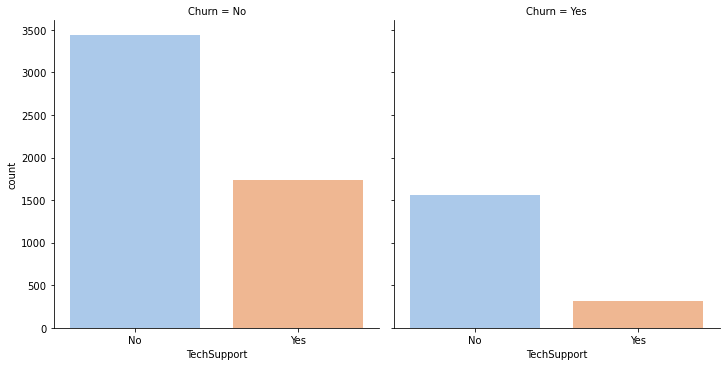

In [83]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

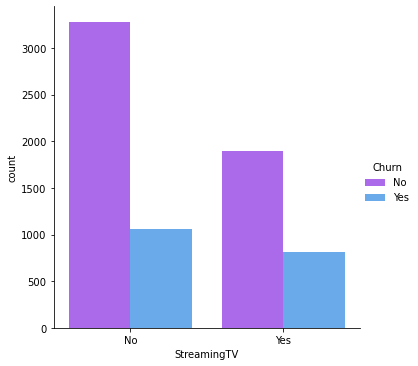

In [84]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

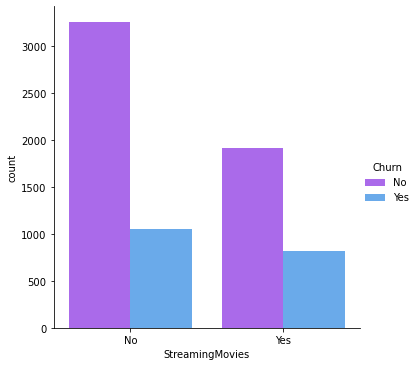

In [85]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

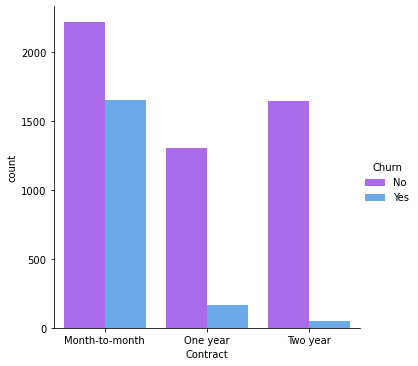

In [87]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

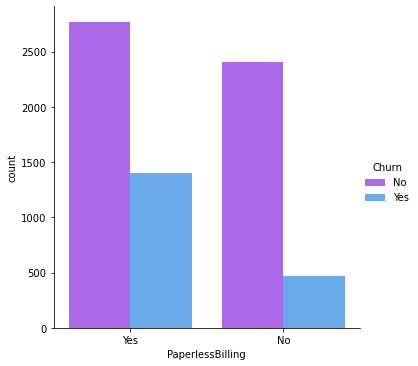

In [88]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The customers who prefer paperless billing they have high churn rate.

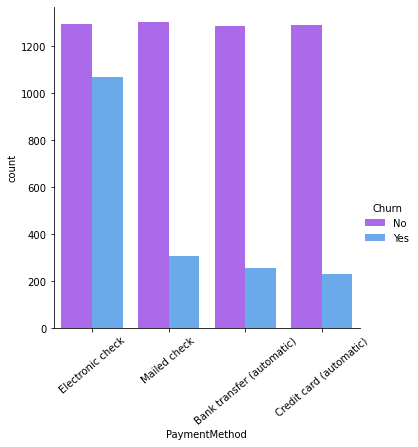

In [91]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="cool_r",kind="count",data=df)
plt.xticks(rotation=40)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

## Multivariate Analysis

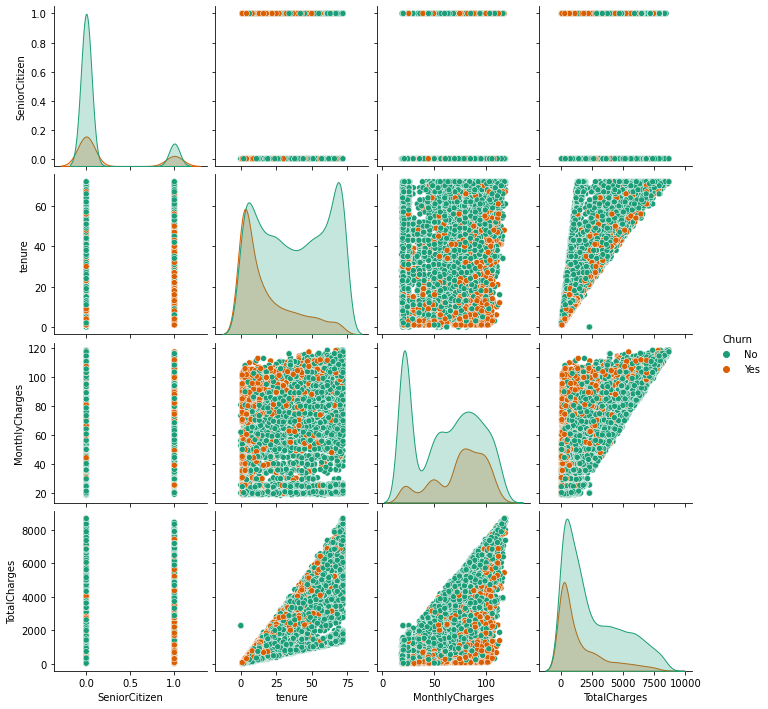

In [92]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

## Pre-processing Data

## Identifying the outliers

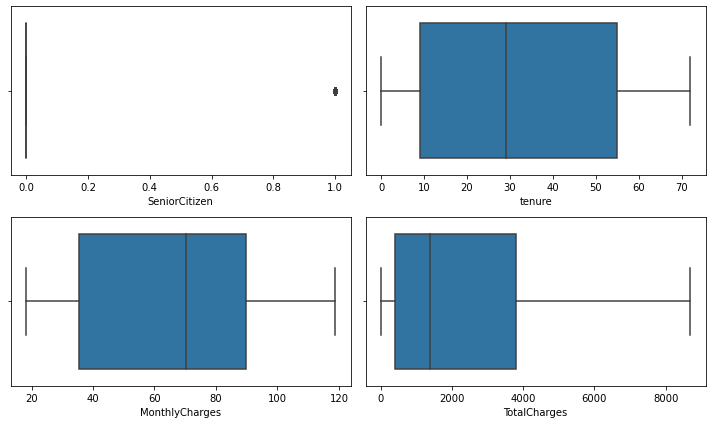

In [93]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

## Checking for skewness

In [96]:
df.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
SeniorCitizen     1.833633
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

## Removing skewness

In [97]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [98]:
# Checking skewness again
df.skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges      0.011168
tenure            0.239540
SeniorCitizen     1.833633
dtype: float64

## Encoding the categorical columns using Ordinal Encoding

In [100]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


Now we have converted the categorical columns into numerical columns using Ordinal Encoding method.

## Statistical Overview of the DataSet

In [101]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.

## Correlation between the target variable and independent variables using HEAT map

In [102]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.469982,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.409133,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.491811,-0.082255


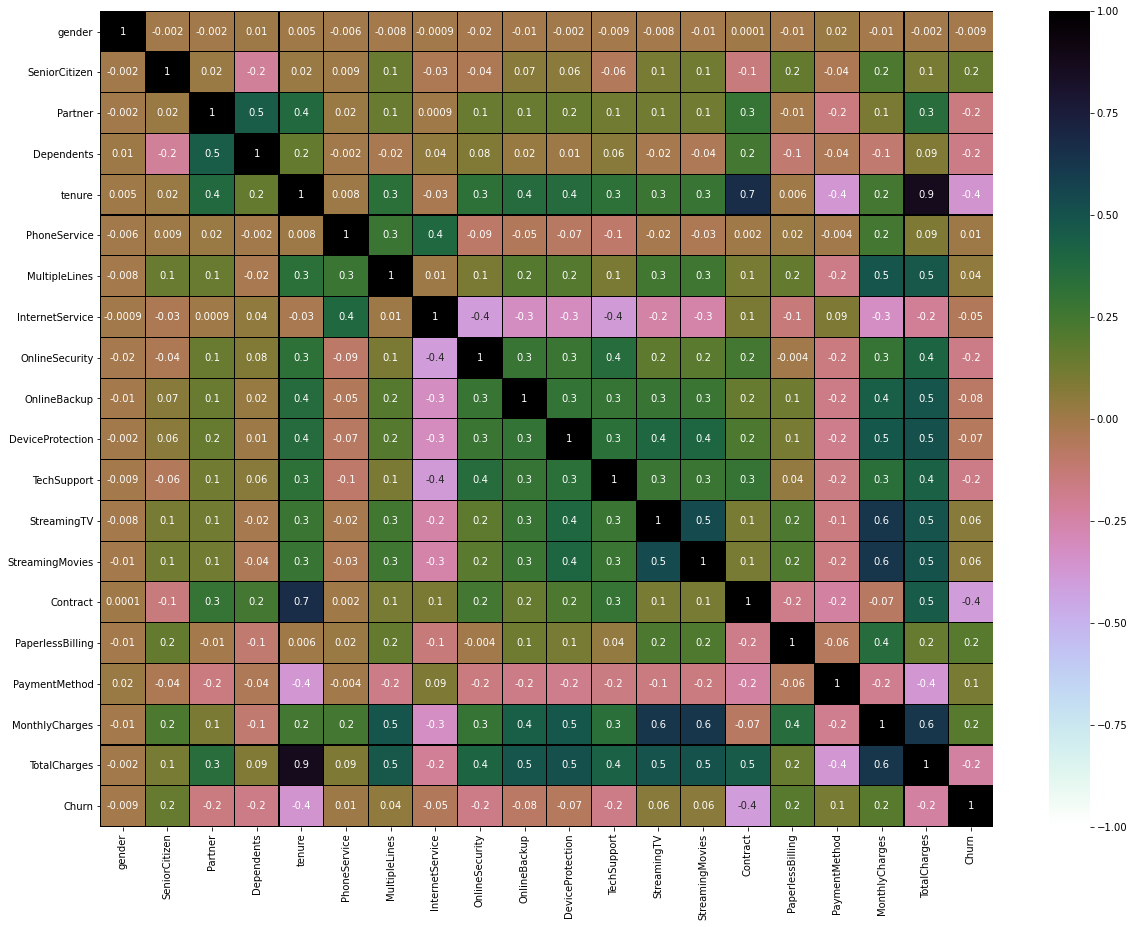

In [103]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

There is no much positive correlation between the target and features.

The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label, we can drop it if necessary.

The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [104]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.233781
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# Visualizing the correlation between label and features using bar plot

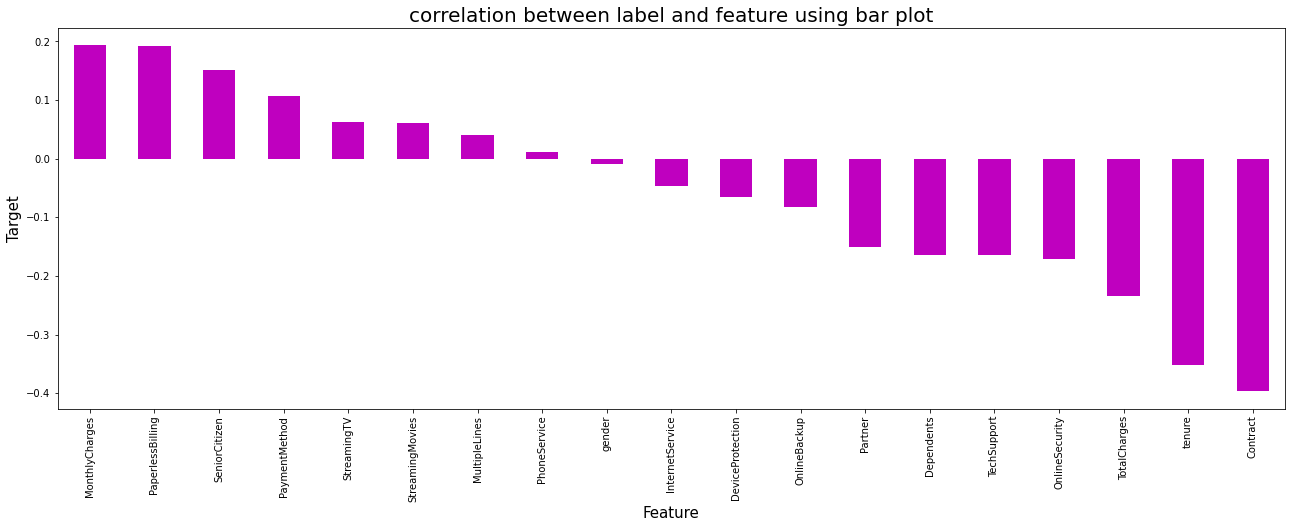

In [105]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

## Separating the feature and label into x and y

In [106]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

## Feature Scaling using Standard Scalarization

In [108]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,-1.183234,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,0.172250,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

## Checking Multi-Colinearity

In [110]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001712,gender
1,1.149673,SeniorCitizen
2,1.462976,Partner
3,1.383916,Dependents
4,12.357689,tenure
5,1.712629,PhoneService
6,1.548863,MultipleLines
7,1.904736,InternetService
8,1.476713,OnlineSecurity
9,1.480046,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [111]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [112]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


All the columns have VIF less than 10which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

## Oversampling

In [114]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [116]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

## Modeling

### Finding best random state

In [118]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8673107890499195  on Random_state  79


We have got the best random state and maximum accuracy.

## Creating train_test split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Logistic Regression Base Line Model

In [124]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7948470209339774
[[1171  377]
 [ 260 1297]]
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1548
         1.0       0.77      0.83      0.80      1557

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



We have got an accuracy score of 79% with the base line model

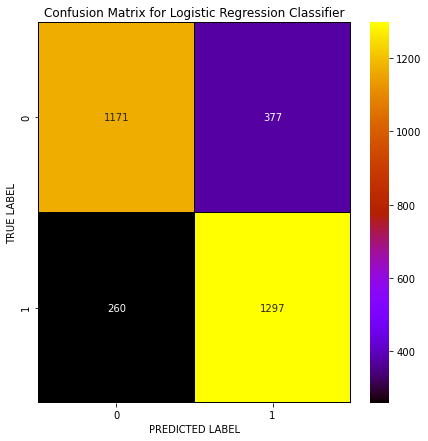

In [125]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

## Random Forest Classifier

In [122]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.865378421900161
[[1332  216]
 [ 202 1355]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1548
         1.0       0.86      0.87      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



We have got the accuracy score of 86% with Random Forest Regressor

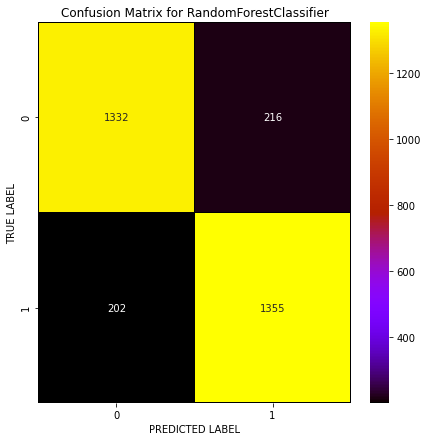

In [126]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Support Vector Machine Classifier

In [127]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8296296296296296
[[1223  325]
 [ 204 1353]]
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      1548
         1.0       0.81      0.87      0.84      1557

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



We have got an accuracy score of 83% with the SVC model

## AdaBoost Classifier

In [128]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8280193236714976
[[1229  319]
 [ 215 1342]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      1548
         1.0       0.81      0.86      0.83      1557

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



We have got an accuracy score of 82% with the AdaBoostClassifier

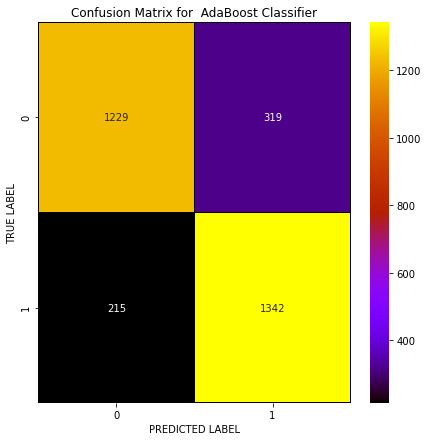

In [129]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

## Gradient Boosting Classifier

In [130]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8521739130434782
[[1268  280]
 [ 179 1378]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1548
         1.0       0.83      0.89      0.86      1557

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



We have got an accuracy score of 85% with the Gradient Boosting Classifier

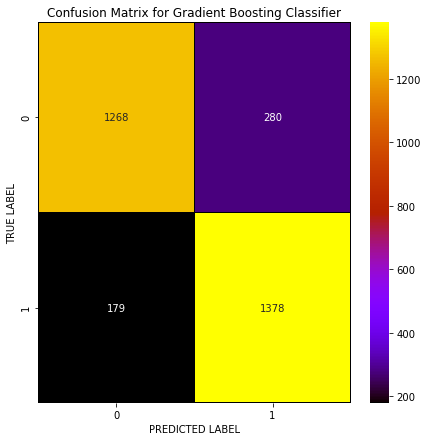

In [131]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## XGB Classifier

In [132]:
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(x_train,y_train)

# Prediction
predxgb = xgb.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

0.8698872785829308
[[1351  197]
 [ 207 1350]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1548
         1.0       0.87      0.87      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



We have got an accuracy score of 87% with XGB classifier

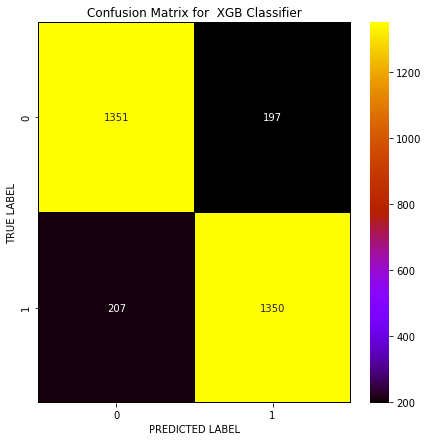

In [133]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

## Naive Bias Classifier

In [135]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Prediction
predgnb = gnb.predict(x_test)

print(accuracy_score(y_test, predgnb))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test,predgnb))

0.7800322061191627
[[1115  433]
 [ 250 1307]]
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77      1548
         1.0       0.75      0.84      0.79      1557

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



We have got an accuracy score of 78% with GaussianNB

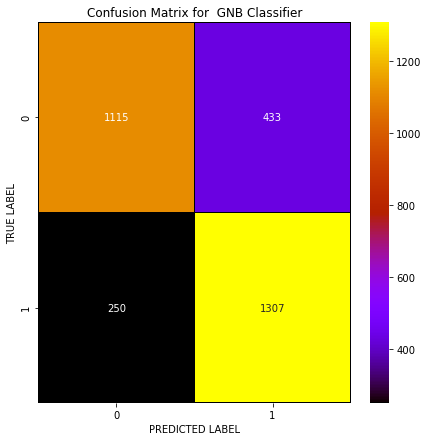

In [137]:
# Lets plot confusion matrix for  GaussianNB
cm = confusion_matrix(y_test,predgnb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GNB Classifier')
plt.show()

## Extra Trees Classifier

In [138]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.8698872785829308
[[1334  214]
 [ 190 1367]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1548
         1.0       0.86      0.88      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



We have got an accuracy score of 87% with the xtc model

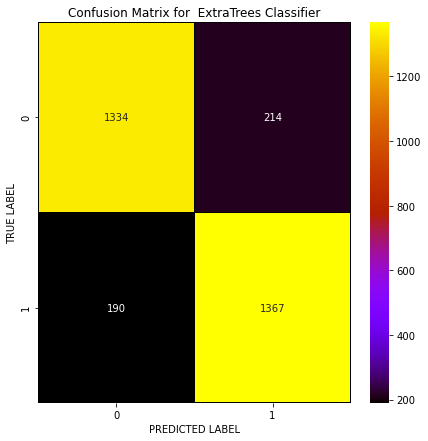

In [139]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

## Cross Validation Score

In [141]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print('Support Vector Machine Classifier:',cross_val_score(svc,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for XGB Classifier
print('XGB Classifier:',cross_val_score(xgb,x,y,cv=5).mean())

# cv score for Naive Bias Classifier
print('Naive Bias Classifier:',cross_val_score(gnb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.7771569266116096
Random Forest Classifier: 0.8525426878956205
Support Vector Machine Classifier: 0.8042186124595186
AdaBoosting Classifier: 0.80876247714712
Gradient Boosting Classifier: 0.8353403240380777
XGB Classifier: 0.8385330727579661
Naive Bias Classifier: 0.7683631150430907
Extra Trees Classifier: 0.8661657829052286


From the difference between the accuracy score and the cross validation score we can conclude that ExtraTrees Classifer as our best fitting model whch is giving very less difference compare to other models.

## Hyper Parameter Tuning

In [145]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [146]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [147]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [148]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

These are the best parameters values that we have got for Extra Trees classifier.

In [149]:
Cust_Churn = ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=300, n_jobs=-2, random_state=10)
Cust_Churn.fit(x_train, y_train)
pred = Cust_Churn.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.34299516908213


The accuracy of best model increased after tuning and giving 87.02%

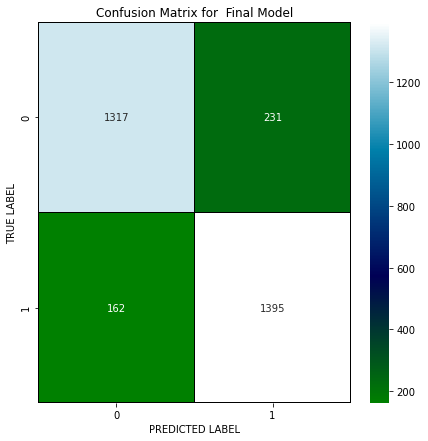

In [150]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

## Plotting ROC and Compare AUC for the best model

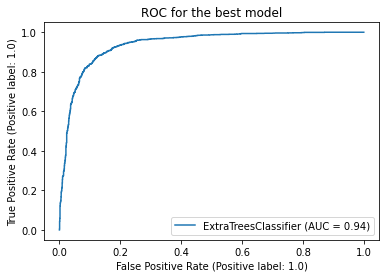

In [154]:
plot_roc_curve(Cust_Churn, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model.

## Saving The Model

In [155]:
import joblib
joblib.dump(Cust_Churn,"Customer_Churn_Analysis(E8).pkl")

['Customer_Churn_Analysis(E8).pkl']

The model is now saved using joblib library.

## Predicting the saved model

In [157]:
# Loading the saved model
model=joblib.load("Customer_Churn_Analysis(E8).pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 1., 1., ..., 1., 1., 0.])

These are the predicted `churned values of the customers.`

In [158]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,1.0
3102,1.0,1.0
3103,1.0,1.0


We can see that the Actual Value and Predicted Value is almost same.

#### Conclusion